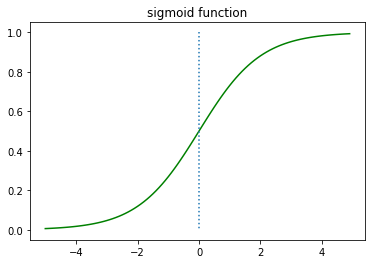

In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset

# %matplotlib inline
import numpy as np  # 넘파이 사용
import matplotlib.pyplot as plt  # 맷플롯립사용


def sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res


x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, "g")
plt.plot([0, 0], [1, 0], ":")
plt.title("sigmoid function")
plt.show()
